# Digging through some Folding@Home data

2020-05-06 - Ongoing

I have no formal training in cheminformatics, so I am going to be stumbling and learning as I wade through this dataset.
I welcome any learning lessons from experts.

This will be an ongoing foray

Source: https://github.com/FoldingAtHome/covid-moonshot

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999

moonshot_df = pd.read_csv('moonshot-submissions/covid_submissions_all_info.csv')

In [2]:
moonshot_df.head()

,SMILES,CID,creator,fragments,link,real_space,SCR,BB,extended_real_space,in_molport_or_mcule,in_ultimate_mcule,in_emolecules,covalent_frag,covalent_warhead,acrylamide,acrylamide_adduct,chloroacetamide,chloroacetamide_adduct,vinylsulfonamide,vinylsulfonamide_adduct,nitrile,nitrile_adduct,MW,cLogP,HBD,HBA,TPSA,num_criterion_violations,BMS,Dundee,Glaxo,Inpharmatica,LINT,MLSMR,PAINS,SureChEMBL,PostEra,ORDERED,MADE,ASSAYED
0,CCN(Cc1cccc(-c2ccncc2)c1)C(=O)Cn1nnc2ccccc21,AAR-POS-8a4e0f60-1,"Aaron Morris, PostEra",x0072,https://covid.postera.ai/covid/submissions/AAR...,Z1260533612,FALSE,FALSE,FALSE,False,False,False,False,False,False,False,False,False,False,False,False,False,371.444,3.5420,0,5,63.91,0,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,True,False,False
1,O=C(Cn1nnc2ccccc21)NCc1ccc(Oc2cccnc2)c(F)c1,AAR-POS-8a4e0f60-10,"Aaron Morris, PostEra",x0072,https://covid.postera.ai/covid/submissions/AAR...,Z826180044,FALSE,FALSE,s_22____1723102____13206668,False,False,False,False,False,False,False,False,False,False,False,False,False,377.379,3.0741,1,6,81.93,0,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,True,False,False
2,CN(Cc1nnc2ccccn12)C(=O)N(Cc1cccs1)c1ccc(Br)cc1,AAR-POS-8a4e0f60-11,"Aaron Morris, PostEra",x0072,https://covid.postera.ai/covid/submissions/AAR...,FALSE,FALSE,FALSE,FALSE,False,False,False,False,False,False,False,False,False,False,False,False,False,456.369,4.8119,0,5,53.74,0,PASS,PASS,PASS,Filter9_metal,aryl bromide,PASS,PASS,PASS,PASS,True,False,False
3,CCN(Cc1cccc(-c2ccncc2)c1)C(=O)Cc1noc2ccccc12,AAR-POS-8a4e0f60-2,"Aaron Morris, PostEra",x0072,https://covid.postera.ai/covid/submissions/AAR...,Z1260535907,FALSE,FALSE,FALSE,False,False,False,False,False,False,False,False,False,False,False,False,False,371.440,4.4810,0,4,59.23,0,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,True,False,False
4,O=C(NCc1noc2ccccc12)N(Cc1cccs1)c1ccc(F)cc1,AAR-POS-8a4e0f60-3,"Aaron Morris, PostEra",x0072,https://covid.postera.ai/covid/submissions/AAR...,FALSE,FALSE,FALSE,s_272164____9388766____17338746,False,False,False,False,False,False,False,False,False,False,False,False,False,381.432,4.9448,1,4,58.37,0,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,True,False,False


The moonshot data has a lot of logging/metadata information, some one-hot-encoding information about functional groups, and some additional columns about Glaxo, Dundee, BMS, Lint, PAINS, SureChEMBL - I'm not sure what those additional coluns mean, but the values are binary values, possibly the results of some other test or availability in another databases.

I'm going to focus on the molecular properties: MW, cLogP, HBD, HBA, TPSA


* MW: Molecular Weight
* cLogP: The logarithm of the partition coefficient (ratio of concentrations in octanol vs water, 
$\log{\frac{c_{octanol}}{c_{water}}}$)
* HBD: Hydrogen bond donors
* HBA: Hydrogen bond acceptors
* TPSA: Topological polar surface area

Some of the correlations make some chemical sense - heavier molecules have more heavy atoms (O, N, F, etc.), but these heavier atoms are also the hydrogen bond acceptors.
By that logic, more heavy atoms also coincides with more electronegative atoms, increasing your TPSA.
It's a little convoluted because TPSA looks at the surface, not necessarily the volume of the compound; geometry/shape will influence TPSA.
There don't appear to be any strong correlations with cLogP.
Partition coefficients are a complex function of polarity, size/sterics, and shape - a 1:1 correlation with a singular, other variable will be hard to pinpoint

This csv file doesn't have much other numerical data, but maybe some of those true/false, pass/fail data might be relevant...but I definitely need more context here


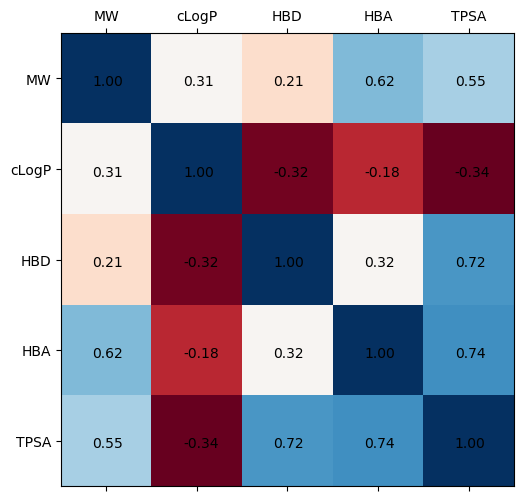

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,6), dpi=100)
cols = ['MW', 'cLogP', 'HBD', 'HBA', 'TPSA']
ax.matshow(moonshot_df[cols].corr(), cmap='RdBu')

ax.set_xticks([i for i,_ in enumerate(cols)])
ax.set_xticklabels(cols)

ax.set_yticks([i for i,_ in enumerate(cols)])
ax.set_yticklabels(cols)

for i, (rowname, row) in enumerate(moonshot_df[cols].corr().iterrows()):
    for j, (key, val) in enumerate(row.iteritems()):
        ax.annotate(f"{val:0.2f}", xy=(i,j), xytext=(-10, -5), textcoords="offset points")


## Some docking results

Okay here's a couple other CSVs I found, these include some docking scores

* Repurposing scores: "The Drug Repurposing Hub is a curated and annotated collection of FDA-approved drugs, clinical trial drugs, and pre-clinical tool compounds with a companion information resource" [source here](https://clue.io/repurposing), so a public dataset of some drugs
* Redock scores: "This directory contains experiments in redocking all screened fragments into the entire ensemble of X-ray structures." Taking fragments and re-docking them

In [4]:
repurposing_df = pd.read_csv('repurposing-screen/drugset-docked.csv')
redock_df = pd.read_csv('redock-fragments/all-screened-fragments-docked.csv')

SMILES strings, names, docking scores

In [5]:
repurposing_df.head()

,SMILES,TITLE,Hybrid2,docked_fragment,Mpro-_dock,site
0,C[C@@H](c1ccc-2c(c1)Cc3c2cccc3)C(=O)[O-],CHEMBL2104122,-11.519580,x0749,0.509349,active-covalent
1,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O)CCC4...,CHEMBL1387,-10.580162,x0749,2.706928,active-covalent
2,CC(C)(C)c1cc(cc(c1O)C(C)(C)C)/C=C\2/C(=O)NC(=[...,CHEMBL275835,-10.557229,x0107,1.801830,active-noncovalent
3,C[C@]12CC[C@@H]3[C@H]4CCCCC4=CC[C@H]3[C@@H]1CC...,CHEMBL2104104,-10.480992,x0749,3.791700,active-covalent
4,CC(=O)[C@]1(CC[C@@H]2[C@@]1(CCC3=C4CCC(=O)C=C4...,CHEMBL2104231,-10.430775,x0749,4.230903,active-covalent


[Hybrid2](https://docs.eyesopen.com/toolkits/java/dockingtk/docking.html) looks like a docking method provided via OpenEye. 
Mpro likely refers to COVID-19 main protease.
I'm not entirely sure what the receptor for "Hybrid2" is, but there seem to be multiple "sites" or "fragments" for docking.
There are lots of different fragments, but very few sites.
For each site-fragment combination, multiple small molecules may have been tested.

In [37]:
repurposing_df['docked_fragment'].value_counts()

x0195    114
x0749     69
x0678     58
x0397     45
x0104     24
x0161     21
x1077     19
x0072     14
x0874     13
x0354     13
x0689     10
x1382      7
x0708      4
x0434      4
x1093      3
x1392      2
x0387      2
x1402      2
x1418      2
x0831      2
x0830      2
x1385      2
x0107      2
x0395      2
x0967      1
x0786      1
x0426      1
x1478      1
x1187      1
x0692      1
x1386      1
x0305      1
x0759      1
x0946      1
Name: docked_fragment, dtype: int64

In [40]:
repurposing_df['site'].value_counts()

active-noncovalent    338
active-covalent       107
dimer-interface         1
Name: site, dtype: int64

In [42]:
repurposing_df.groupby(["docked_fragment", "site"]).count()

,,SMILES,TITLE,Hybrid2,Mpro-_dock
docked_fragment,site,,,,
x0072,active-noncovalent,14,14,14,14
x0104,active-noncovalent,24,24,24,24
x0107,active-noncovalent,2,2,2,2
x0161,active-noncovalent,21,21,21,21
x0195,active-noncovalent,114,114,114,114
x0305,active-noncovalent,1,1,1,1
x0354,active-noncovalent,13,13,13,13
x0387,active-noncovalent,2,2,2,2
x0395,active-noncovalent,2,2,2,2


Some molecules show up multiple times - why?
Upon further investigation, this is mainly due to the molecule's presence in multiple databases

In [44]:
repurposing_df.groupby(['SMILES']).count().sort_values("TITLE")

,TITLE,Hybrid2,docked_fragment,Mpro-_dock,site
SMILES,,,,,
B(CCCC)(O)O,1,1,1,1,1
CCCc1ccccc1N,1,1,1,1,1
CCCc1cc(=O)[nH]c(=S)[nH]1,1,1,1,1,1
CCC[N@@H+]1CCO[C@H]2[C@H]1CCc3c2cc(cc3)O,1,1,1,1,1
CCC[N@@H+]1CCC[C@H]2[C@H]1Cc3c[nH]nc3C2,1,1,1,1,1
...,...,...,...,...,...
C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O)CCC4=CC(=O)CC[C@H]34,2,2,2,2,2
C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)CC(=C)C4=CC(=O)C=C[C@]34C,2,2,2,2,2
CC(C)C[C@@H](C1(CCC1)c2ccc(cc2)Cl)[NH+](C)C,2,2,2,2,2


In [45]:
repurposing_df[repurposing_df['SMILES']=="CC[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@]2(C#C)O)CCC4=CC(=O)CC[C@H]34"]

,SMILES,TITLE,Hybrid2,docked_fragment,Mpro-_dock,site
82,CC[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@]2(C#C)O)CC...,CHEMBL2107797,-9.002963,x0749,2.616094,active-covalent
105,CC[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@]2(C#C)O)CC...,EDRUG178,-8.705896,x0104,2.248707,active-noncovalent


There doesn't seem to be a very good correlation between the two docking scores - if these are docking scores to different receptors, that would help explain things.
It's worth noting that we're not seeing if the two numbers agree for each molecule, but if the trends persist (both scores go up for this molecule, but go down for this other molecule).
The weak correlation suggests the trends do not persist between the two docking measures

In [30]:
repurposing_df[['Hybrid2', 'Mpro-_dock']].corr()

,Hybrid2,Mpro-_dock
Hybrid2,1.000000,0.581966
Mpro-_dock,0.581966,1.000000


Redocking dataframe: SMILES, names, data collection information, docking scores

In [6]:
redock_df.head()

,SMILES,TITLE,fragments,CompoundCode,Unnamed: 4,covalent_warhead,MountingResult,DataCollectionOutcome,DataProcessingResolutionHigh,RefinementOutcome,Deposition_PDB_ID,Hybrid2,docked_fragment,Mpro-x0500_dock,site
0,c1ccc(c(c1)NCc2ccn[nH]2)F,x0500,x0500,Z1545196403,NaN,False,OK: No comment:No comment,success,2.19,7 - Analysed & Rejected,NaN,-11.881923,x0678,-2.501554,active-noncovalent
1,Cc1ccccc1OCC(=O)Nc2ncccn2,x0415,x0415,Z53834613,NaN,False,OK: No comment:No comment,success,1.62,7 - Analysed & Rejected,NaN,-11.622278,x0678,NaN,active-noncovalent
2,Cc1csc(n1)CNC(=O)c2ccn[nH]2,x0356,x0356,Z466628048,NaN,False,OK: No comment:No comment,success,3.25,7 - Analysed & Rejected,NaN,-11.435024,x0678,NaN,active-noncovalent
3,Cc1csc(n1)CNC(=O)c2ccn[nH]2,x1113,x1113,Z466628048,NaN,False,OK: No comment:No comment,success,1.57,7 - Analysed & Rejected,NaN,-11.435024,x0678,NaN,active-noncovalent
4,c1cc(cnc1)NC(=O)CC2CCCCC2,x0678,x0678,Z31792168,NaN,False,Mounted_Clear,success,1.83,6 - Deposited,5R84,-11.355046,x0678,NaN,active-noncovalent


There don't seem to be many Mpro docking scores in this dataset (only one molecule has a non-null Mpro docking score)

In [49]:
redock_df[redock_df['Mpro-x0500_dock'].isnull()].count()

SMILES                          1452
TITLE                           1452
fragments                       1452
CompoundCode                    1452
Unnamed: 4                         0
covalent_warhead                1452
MountingResult                  1452
DataCollectionOutcome           1452
DataProcessingResolutionHigh    1357
RefinementOutcome               1306
Deposition_PDB_ID                 78
Hybrid2                         1452
docked_fragment                 1452
Mpro-x0500_dock                    0
site                            1452
dtype: int64

In [50]:
redock_df[~redock_df['Mpro-x0500_dock'].isnull()].count()

SMILES                          1
TITLE                           1
fragments                       1
CompoundCode                    1
Unnamed: 4                      0
covalent_warhead                1
MountingResult                  1
DataCollectionOutcome           1
DataProcessingResolutionHigh    1
RefinementOutcome               1
Deposition_PDB_ID               0
Hybrid2                         1
docked_fragment                 1
Mpro-x0500_dock                 1
site                            1
dtype: int64

Are there overlaps in the molecules in each of these datasets?

In [7]:
repurpose_redock = repurposing_df.merge(redock_df, on='SMILES', how='inner',suffixes=("_L", "_R"))

In [8]:
moonshot_redock = moonshot_df.merge(redock_df, on='SMILES', how='inner',suffixes=("_L", "_R"))

In [9]:
repurpose_redock

,SMILES,TITLE_L,Hybrid2_L,docked_fragment_L,Mpro-_dock,site_L,TITLE_R,fragments,CompoundCode,Unnamed: 4,covalent_warhead,MountingResult,DataCollectionOutcome,DataProcessingResolutionHigh,RefinementOutcome,Deposition_PDB_ID,Hybrid2_R,docked_fragment_R,Mpro-x0500_dock,site_R
0,Cc1cc(=O)n([nH]1)c2ccccc2,CHEMBL290916,-7.889587,x0195,-2.068452,active-noncovalent,x0297,x0297,Z50145861,NaN,False,OK: No comment:No comment,success,1.98,7 - Analysed & Rejected,NaN,-7.889587,x0195,NaN,active-noncovalent
1,CC(C)Nc1ncccn1,CHEMBL1740513,-7.178702,x0072,-1.248482,active-noncovalent,x0583,x0583,Z31190928,NaN,False,OK: No comment:No comment,success,3.08,7 - Analysed & Rejected,NaN,-7.293537,x1093,NaN,active-noncovalent
2,CC(C)Nc1ncccn1,CHEMBL1740513,-7.178702,x0072,-1.248482,active-noncovalent,x1102,x1102,Z31190928,NaN,False,OK: No comment:No comment,success,1.46,7 - Analysed & Rejected,NaN,-7.293537,x1093,NaN,active-noncovalent
3,C[C@H](C(=O)[O-])O,CHEMBL1200559,-5.675188,x0397,-0.179049,active-noncovalent,x1035,x1035,Z1741982441,NaN,False,OK: No comment:No comment,Failed - no diffraction,NaN,NaN,NaN,-6.505556,x0397,NaN,active-noncovalent
4,CC(=O)C(=O)[O-],DB00119,-5.448891,x0689,-0.494791,active-covalent,x1037,x1037,Z1741977082,NaN,False,OK: No comment:No comment,Failed - no diffraction,NaN,NaN,NaN,-5.448891,x0689,NaN,active-covalent
5,CCC(=O)[O-],CHEMBL14021,-5.374838,x0397,-0.555688,active-noncovalent,x1029,x1029,Z955123616,NaN,False,OK: No comment:No comment,success,1.73,7 - Analysed & Rejected,NaN,-5.135675,x0689,NaN,active-covalent
6,C1CNCC[NH2+]1,CHEMBL1412,-5.079155,x0354,1.716032,active-noncovalent,x0996,x0996,Z1245537944,NaN,False,OK: No comment:No comment,success,1.96,7 - Analysed & Rejected,NaN,-4.675085,x0354,NaN,active-noncovalent


We joined on SMILES string, and now we can compare the docking scores between the repurposing and redocking datasets.

Some `Hybrid2` scores look quantitatively similar, but for those that don't, the ranking is still there.
Looking at the COVID-19 main protease (Mpro I believe?), the docking scores don't follow similar rankings - docking scores aren't transferable to different receptors (this might be a fairly obvious observation)

In [10]:
repurpose_redock[['SMILES', "TITLE_L", "TITLE_R", "Hybrid2_L", "Hybrid2_R", 'Mpro-_dock', 'Mpro-x0500_dock']]

,SMILES,TITLE_L,TITLE_R,Hybrid2_L,Hybrid2_R,Mpro-_dock,Mpro-x0500_dock
0,Cc1cc(=O)n([nH]1)c2ccccc2,CHEMBL290916,x0297,-7.889587,-7.889587,-2.068452,NaN
1,CC(C)Nc1ncccn1,CHEMBL1740513,x0583,-7.178702,-7.293537,-1.248482,NaN
2,CC(C)Nc1ncccn1,CHEMBL1740513,x1102,-7.178702,-7.293537,-1.248482,NaN
3,C[C@H](C(=O)[O-])O,CHEMBL1200559,x1035,-5.675188,-6.505556,-0.179049,NaN
4,CC(=O)C(=O)[O-],DB00119,x1037,-5.448891,-5.448891,-0.494791,NaN
5,CCC(=O)[O-],CHEMBL14021,x1029,-5.374838,-5.135675,-0.555688,NaN
6,C1CNCC[NH2+]1,CHEMBL1412,x0996,-5.079155,-4.675085,1.716032,NaN


Joining the moonshot submission and redocking datasets does not yield too many overlapping molecules

In [11]:
moonshot_redock

,SMILES,CID,creator,fragments_L,link,real_space,SCR,BB,extended_real_space,in_molport_or_mcule,in_ultimate_mcule,in_emolecules,covalent_frag,covalent_warhead_L,acrylamide,acrylamide_adduct,chloroacetamide,chloroacetamide_adduct,vinylsulfonamide,vinylsulfonamide_adduct,nitrile,nitrile_adduct,MW,cLogP,HBD,HBA,TPSA,num_criterion_violations,BMS,Dundee,Glaxo,Inpharmatica,LINT,MLSMR,PAINS,SureChEMBL,PostEra,ORDERED,MADE,ASSAYED,TITLE,fragments_R,CompoundCode,Unnamed: 4,covalent_warhead_R,MountingResult,DataCollectionOutcome,DataProcessingResolutionHigh,RefinementOutcome,Deposition_PDB_ID,Hybrid2,docked_fragment,Mpro-x0500_dock,site
0,CC(C)Nc1cccnc1,MAK-UNK-2c1752f0-4,Maksym Voznyy,x1093,https://covid.postera.ai/covid/submissions/MAK...,FALSE,Z2574930241,EN300-56005,FALSE,False,False,False,False,False,False,False,False,False,False,False,False,False,136.198,1.9019,1,2,24.92,0,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,False,False,False,x1098,x1098,Z1259341037,NaN,False,OK: No comment:No comment,success,1.66,7 - Analysed & Rejected,NaN,-7.474369,x0678,NaN,active-noncovalent
1,CC(C)Nc1cccnc1,MAK-UNK-2c1752f0-4,Maksym Voznyy,x1093,https://covid.postera.ai/covid/submissions/MAK...,FALSE,Z2574930241,EN300-56005,FALSE,False,False,False,False,False,False,False,False,False,False,False,False,False,136.198,1.9019,1,2,24.92,0,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,PASS,False,False,False,x0572,x0572,Z1259341037,NaN,False,OK: No comment:No comment,success,2.98,7 - Analysed & Rejected,NaN,-7.474369,x0678,NaN,active-noncovalent
2,CCS(=O)(=O)Nc1ccccc1F,MAK-UNK-2c1752f0-5,Maksym Voznyy,x1093,https://covid.postera.ai/covid/submissions/MAK...,FALSE,Z53825177,EN300-116204,FALSE,False,True,False,False,False,False,False,False,False,False,False,False,False,203.238,1.5873,1,2,46.17,0,PASS,PASS,PASS,PASS,PASS,Hetero_hetero,PASS,PASS,PASS,False,False,False,x0247,x0247,Z53825177,NaN,False,OK: No comment:No comment,success,1.83,7 - Analysed & Rejected,NaN,-7.413380,x0678,NaN,active-noncovalent


## Comparing other databases

CHEMBL, DrugBank, and "EDrug"(?) look to be the 3 prefixes in the "TITLE" column

In [14]:
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
res = molecule.search('CHEMBL1387')

In [16]:
res_df = pd.DataFrame.from_dict(res)

In [24]:
res_df.columns

Index(['atc_classifications', 'availability_type', 'biotherapeutic',
       'black_box_warning', 'chebi_par_id', 'chirality', 'cross_references',
       'dosed_ingredient', 'first_approval', 'first_in_class', 'helm_notation',
       'indication_class', 'inorganic_flag', 'max_phase', 'molecule_chembl_id',
       'molecule_hierarchy', 'molecule_properties', 'molecule_structures',
       'molecule_synonyms', 'molecule_type', 'natural_product', 'oral',
       'parenteral', 'polymer_flag', 'pref_name', 'prodrug', 'score',
       'structure_type', 'therapeutic_flag', 'topical', 'usan_stem',
       'usan_stem_definition', 'usan_substem', 'usan_year', 'withdrawn_class',
       'withdrawn_country', 'withdrawn_flag', 'withdrawn_reason',
       'withdrawn_year'],
      dtype='object')

In [25]:
res_df[['chirality', 'molecule_properties', 'molecule_structures', 'score']]

,chirality,molecule_properties,molecule_structures,score
0,1,"{'alogp': '3.64', 'aromatic_rings': 0, 'cx_log...",{'canonical_smiles': 'C#C[C@]1(O)CC[C@H]2[C@@H...,17.0


In [27]:
res_df[['molecule_properties']].values[0]

array([{'alogp': '3.64', 'aromatic_rings': 0, 'cx_logd': '2.81', 'cx_logp': '2.81', 'cx_most_apka': None, 'cx_most_bpka': None, 'full_molformula': 'C20H26O2', 'full_mwt': '298.43', 'hba': 2, 'hba_lipinski': 2, 'hbd': 1, 'hbd_lipinski': 1, 'heavy_atoms': 22, 'molecular_species': None, 'mw_freebase': '298.43', 'mw_monoisotopic': '298.1933', 'num_lipinski_ro5_violations': 0, 'num_ro5_violations': 0, 'psa': '37.30', 'qed_weighted': '0.55', 'ro3_pass': 'N', 'rtb': 0}],
      dtype=object)

In [29]:
res_df['molecule_properties'].apply(pd.Series)

,alogp,aromatic_rings,cx_logd,cx_logp,cx_most_apka,cx_most_bpka,full_molformula,full_mwt,hba,hba_lipinski,hbd,hbd_lipinski,heavy_atoms,molecular_species,mw_freebase,mw_monoisotopic,num_lipinski_ro5_violations,num_ro5_violations,psa,qed_weighted,ro3_pass,rtb
0,3.64,0,2.81,2.81,None,None,C20H26O2,298.43,2,2,1,1,22,None,298.43,298.1933,0,0,37.30,0.55,N,0


In [66]:
all_results = [molecule.search(a) for a in repurposing_df['TITLE']]

Here's a big Python function tangent.

For each chembl molecule, we've searched for it within the chembl, returning us a list (of length 1) containing a dictionary of properties. 

All moleucles have been compiled into a list, so we have a list of lists of dictioanries.

For sanity, we can use a Python `filter` to only retain the non-None results.

We can chain that with a Python `map` function to parse the first item from each molecule's list. 
Recall, each molecule was a list with just one element, a dictionary.
We can boil this down to only returning the dictionary (eliminating the list wrapper).

For validation, I've called `next` to look at the results

In [72]:
filtered = map(lambda x: x[0], filter(lambda x: x is not None, all_results))

In [76]:
next(filtered)

{'atc_classifications': [],
 'availability_type': -1,
 'biotherapeutic': None,
 'black_box_warning': 0,
 'chebi_par_id': None,
 'chirality': 0,
 'cross_references': [],
 'dosed_ingredient': False,
 'first_approval': None,
 'first_in_class': 0,
 'helm_notation': None,
 'indication_class': 'Anti-Inflammatory',
 'inorganic_flag': 0,
 'max_phase': 0,
 'molecule_chembl_id': 'CHEMBL2104122',
 'molecule_hierarchy': {'molecule_chembl_id': 'CHEMBL2104122',
  'parent_chembl_id': 'CHEMBL2104122'},
 'molecule_properties': {'alogp': '3.45',
  'aromatic_rings': 2,
  'cx_logd': '1.26',
  'cx_logp': '3.92',
  'cx_most_apka': '4.68',
  'cx_most_bpka': None,
  'full_molformula': 'C16H14O2',
  'full_mwt': '238.29',
  'hba': 1,
  'hba_lipinski': 2,
  'hbd': 1,
  'hbd_lipinski': 1,
  'heavy_atoms': 18,
  'molecular_species': 'ACID',
  'mw_freebase': '238.29',
  'mw_monoisotopic': '238.0994',
  'num_lipinski_ro5_violations': 0,
  'num_ro5_violations': 0,
  'psa': '37.30',
  'qed_weighted': '0.74',
  'ro3_pa

In [55]:
chembl_df = pd.DataFrame.from_dict(all_results)

KeyboardInterrupt: 

In [ ]:
chembl_df.head()

DrugBank

I found someone had already [downloaded the database](https://github.com/choderalab/nano-drugbank/blob/master/df_drugbank_smiles.csv)